# Phase 1 Training

2 classes:
['Fresh', 'Rotten']


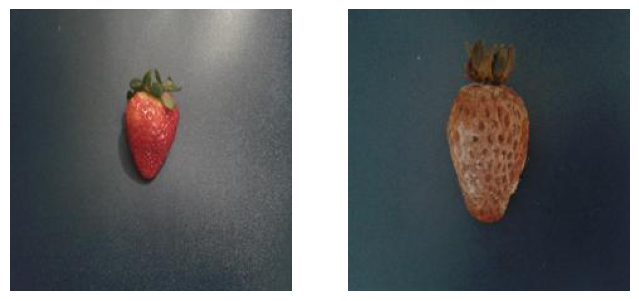

Data loaders ready


C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: 1


C:\Users\Admin\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training set: Average loss: 0.258469
Validation set: Average loss: 0.221266, Accuracy: 1455/1604 (91%)

Epoch: 2
Training set: Average loss: 0.116161
Validation set: Average loss: 0.284224, Accuracy: 1420/1604 (89%)

Epoch: 3
Training set: Average loss: 0.078101
Validation set: Average loss: 0.431164, Accuracy: 1399/1604 (87%)

Epoch: 4
Training set: Average loss: 0.086256
Validation set: Average loss: 0.436860, Accuracy: 1415/1604 (88%)

Epoch: 5
Training set: Average loss: 0.055516
Validation set: Average loss: 0.408071, Accuracy: 1417/1604 (88%)



In [3]:
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import models

# Paths to the dataset folders
train_dir = 'C:\\Users\\Admin\\Desktop\\GAIP Proj Dataset\\Train' 
test_dir =  'C:\\Users\Admin\\Desktop\\GAIP Proj Dataset\\Test'

# Check and print the number of classes
classes = os.listdir(train_dir)
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder (for train dataset)
fig = plt.figure(figsize=(8, 12)) #inches
i = 0
for sub_dir in os.listdir(train_dir):
    i += 1
    img_file = os.listdir(os.path.join(train_dir, sub_dir))[0]
    img_path = os.path.join(train_dir, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a = fig.add_subplot(1, len(classes), i)
    a.axis('off')
    imgplot = plt.imshow(img)
plt.show()

# Function to load dataset
def load_dataset(train_dir, test_dir):
    transformation = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
    
    train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=transformation)
    test_dataset = torchvision.datasets.ImageFolder(root=test_dir, transform=transformation)

    train_loader = torch.utils.data.DataLoader(
                    train_dataset,
                    batch_size=50, 
                    num_workers=0,
                    shuffle=True)
    
    test_loader = torch.utils.data.DataLoader(
                    test_dataset,
                    batch_size=50, 
                    num_workers=0,
                    shuffle=True)
    
    return train_loader, test_loader

train_loader, test_loader = load_dataset(train_dir, test_dir)
print('Data loaders ready')

# Define training function
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    print("Epoch:", epoch)
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_criteria(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        
    avg_loss = train_loss / (batch_idx + 1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

# Define testing function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_criteria(output, target).item()
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target == predicted).item()

    avg_loss = test_loss / batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    return avg_loss

# Define model, loss, optimizer
model = models.resnet18(pretrained=True)
num_classes = len(classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

loss_criteria = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Track metrics in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 5 epochs (in a real scenario, you'd likely use many more)
epochs = 5
for epoch in range(1, epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, epoch)
    test_loss = test(model, device, test_loader)
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)


In [10]:
import torch
import torch.nn as nn
from torchvision import models
torch.save(model.state_dict(), 'C:\\Users\\Admin\\Desktop\\GAIP Proj Dataset\\fruit_freshness_model_torch.pth')
print('Model saved successfully')

Model saved successfully


In [1]:
def calculate_accuracy(model, device, data_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    
    with torch.no_grad():  # Disable gradient calculation
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy

# Calculate and print accuracy on the test dataset
test_accuracy = calculate_accuracy(model, device, test_loader)
print('Test Accuracy: {:.2f}%'.format(test_accuracy))


NameError: name 'model' is not defined

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data transforms (normalization for test set)
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load data
test_dataset = datasets.ImageFolder(root='C:\\Users\Admin\\Desktop\\GAIP Proj Dataset\\Test', transform=data_transforms)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)
import torch
import torch.nn as nn
from torchvision import models

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=False)  # Set pretrained=False, as we will load our weights

# Modify the final fully connected layer to match the number of classes (10 classes)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)  # Assuming 10 classes

# Move the model to the device (GPU or CPU)
model = model.to(device)

# Load the saved model weights
model.load_state_dict(torch.load('C:\\Users\\Admin\\Desktop\\GAIP Proj Dataset\\fruit_freshness_model_torch.pth'))

# Define the accuracy calculation function
def calculate_accuracy(model, device, data_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Assuming you have already defined and loaded your test_loader
# Calculate and print accuracy on the test dataset
test_accuracy = calculate_accuracy(model, device, test_loader)
print('Test Accuracy: {:.2f}%'.format(test_accuracy))

C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([2, 512]) from checkpoint, the shape in current model is torch.Size([10, 512]).
	size mismatch for fc.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([10]).

# Phase 2 Training

In [4]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split

# Define transforms
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Path to your dataset
data_dir = "C:\\Users\\Admin\\Desktop\\Kaggle Dataset 1"

# Create the dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Split dataset into train, validation, and test sets
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Print dataset sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")


Training set size: 17141
Validation set size: 3673
Test set size: 3674


In [8]:
import torch.nn as nn
import torchvision.models as models

# Define the model
class FruitClassifier(nn.Module):
    def __init__(self, num_classes=2):
        super(FruitClassifier, self).__init__()
        resnet = models.resnet18(pretrained=True)
        self.backbone = nn.Sequential(*list(resnet.children())[:-1])
        self.fc = nn.Linear(resnet.fc.in_features, num_classes)
        
    def forward(self, x):
        x = self.backbone(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Initialize the model
model = FruitClassifier(num_classes=2)  # Adjust num_classes based on your dataset

# Print model architecture
print(model)

FruitClassifier(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [9]:
import torch.optim as optim

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

FruitClassifier(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [10]:
import os
import copy

# Function to train the model with early stopping based on validation accuracy
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=20, patience=5):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    early_stopping_counter = 0
    
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-" * 10)
        
        # Training phase
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Training Loss: {epoch_loss:.4f}")
        
        # Validation phase
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_accuracy = correct / total
        print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
        
        # Check if this is the best model
        if val_accuracy > best_acc:
            best_acc = val_accuracy
            best_model_wts = copy.deepcopy(model.state_dict())
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
        
        # Save checkpoint
        if not os.path.exists('saved_models'):
            os.makedirs('saved_models')
        torch.save(model.state_dict(), f'saved_models/resnet18_fruit_classifier_epoch_{epoch+1}.pt')
        
        # Early stopping
        if early_stopping_counter >= patience:
            print("Early stopping")
            break
    
    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

# Train the model
model = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=20, patience=5)

Epoch 1/20
----------


IndexError: Target 9 is out of bounds.